In [1]:
# import required packages

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix

In [2]:
white_wines = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
z = np.abs(stats.zscore(white_wines))
white_wines = white_wines[(z < 3).all(axis=1)]
white_wines.shape

(4487, 12)

In [4]:
reviews = []
for i in white_wines['quality']:
    if i == 3 or i == 4:
        reviews.append('1')
    elif i > 4 and i < 8:
        reviews.append('2')
    elif i == 8 or i == 9:
        reviews.append('3')
white_wines['Reviews'] = reviews
Counter(white_wines['Reviews'])

Counter({'2': 4202, '3': 161, '1': 124})

In [5]:
# Define features X
X = np.asarray(white_wines.iloc[:,:11])
# Define target y
y = np.asarray(white_wines['Reviews'])
# standarlizing the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
# Train and test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


In [6]:
#SMOTE
sm = SMOTE(sampling_strategy='all', random_state = 2) 
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split( X, y, test_size=0.2, random_state=0)
X_train_smote, y_train_smote = sm.fit_sample(X_train_smote, y_train_smote)###
counter = Counter(y_train_smote)
print(counter)

Counter({'2': 3354, '1': 3354, '3': 3354})


In [7]:
#Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split( X, y, test_size=0.2, random_state=0)
X_train_ros, y_train_ros = ros.fit_sample(X_train_ros, y_train_ros)
counter = Counter(y_train_ros)
print(counter)

Counter({'2': 3354, '1': 3354, '3': 3354})


In [8]:
#Udersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split( X, y, test_size=0.2, random_state=0)
X_train_rus, y_train_rus = rus.fit_sample(X_train_rus, y_train_rus)
counter = Counter(y_train_rus)
print(counter)

Counter({'1': 97, '2': 97, '3': 97})


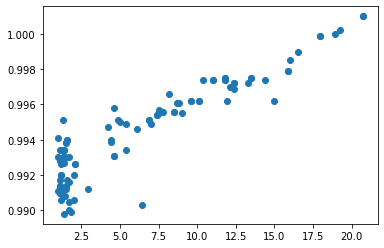

In [9]:
#comparing the original and resampled dataset

origin_density = white_wines['residual sugar'].to_numpy()[:100]
origin_acidity = white_wines['density'].to_numpy()[:100]
plt.scatter(origin_density, origin_acidity)

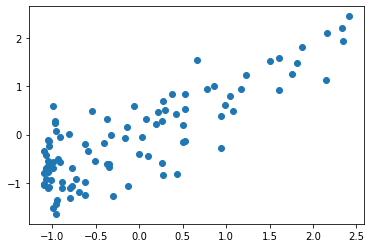

In [10]:
plt.scatter(X_train_smote[:100,3], X_train_smote[:100,7])

In [11]:

#from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt
#import numpy as np

classes = ['bad', 'good', 'excellent']

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):

    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # 在混淆矩阵中每格的概率值
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()

0.9097995545657016
[[  5  22   0]
 [ 13 809  26]
 [  0  20   3]]
0.4086859688195991
[[ 21   3   3]
 [188 330 330]
 [  1   6  16]]
0.44097995545657015
[[ 19   6   2]
 [169 359 320]
 [  1   4  18]]
0.4287305122494432
[[ 20   4   3]
 [167 347 334]
 [  1   4  18]]


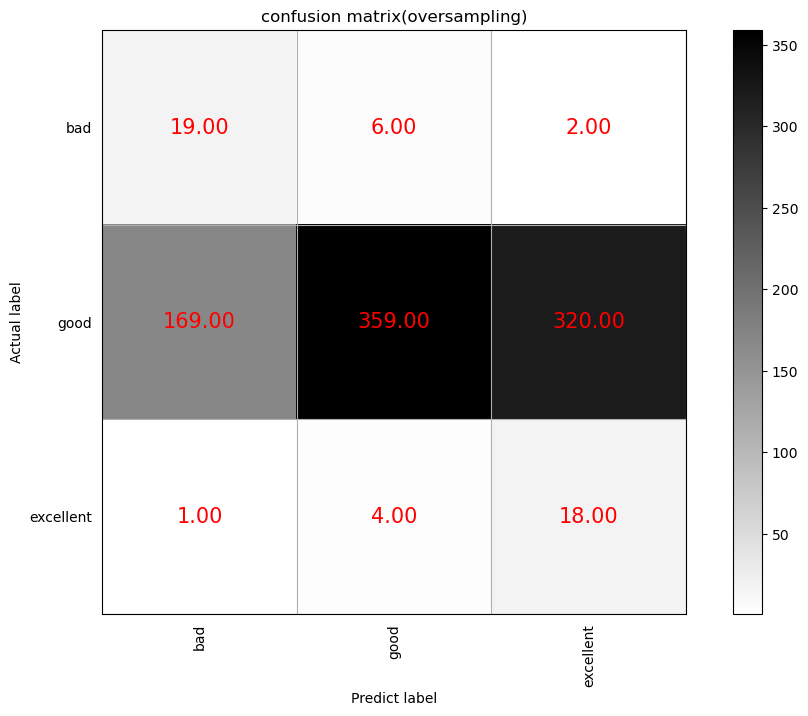

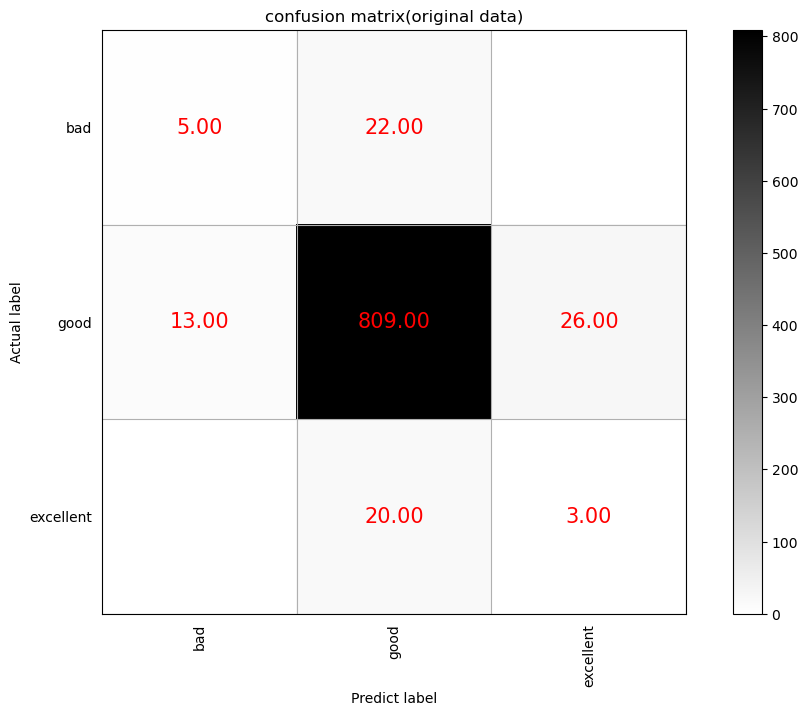

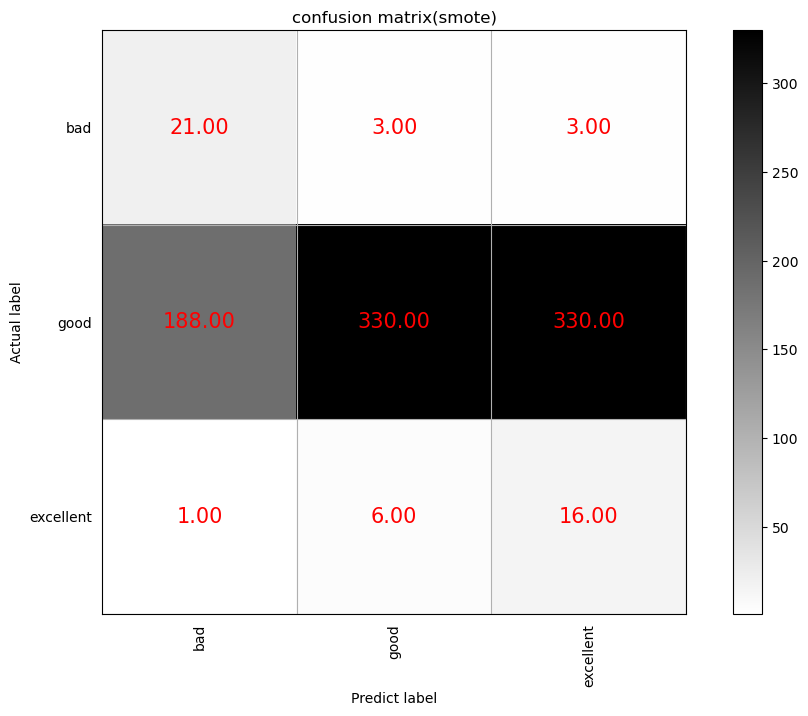

In [12]:
#Bayes
from sklearn.naive_bayes import GaussianNB
#ori
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
score=gnb.score(X_test,y_test,sample_weight=None)
print(score)
print(confusion_matrix(y_test, y_pred))
#smote
gnb_smote = GaussianNB()
y_pred_smote = gnb_smote.fit(X_train_smote, y_train_smote).predict(X_test)
score_smote=gnb_smote.score(X_test,y_test,sample_weight=None)
print(score_smote)
print(confusion_matrix(y_test, y_pred_smote))
#over
gnb_ros = GaussianNB()
y_pred_ros = gnb_ros.fit(X_train_ros, y_train_ros).predict(X_test)
score_ros=gnb_ros.score(X_test,y_test,sample_weight=None)
print(score_ros)
print(confusion_matrix(y_test, y_pred_ros))
#under
gnb_rus = GaussianNB()
y_pred_rus = gnb_rus.fit(X_train_rus, y_train_rus).predict(X_test)
score_rus=gnb_rus.score(X_test,y_test,sample_weight=None)
print(score_rus)
print(confusion_matrix(y_test, y_pred_rus))

cm = confusion_matrix(y_test, y_pred_ros)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(oversampling)')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(original data)')

cm = confusion_matrix(y_test, y_pred_smote)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(smote)')

0.955456570155902
[[  5  22   0]
 [  2 842   4]
 [  0  12  11]]
0.9692444840650769
[[ 15  10   2]
 [ 46 727  75]
 [  0   5  18]]
0.9821707154000445
[[ 11  15   1]
 [ 19 791  38]
 [  0   7  16]]
0.4682415868063294
[[ 21   4   2]
 [187 367 294]
 [  2   5  16]]


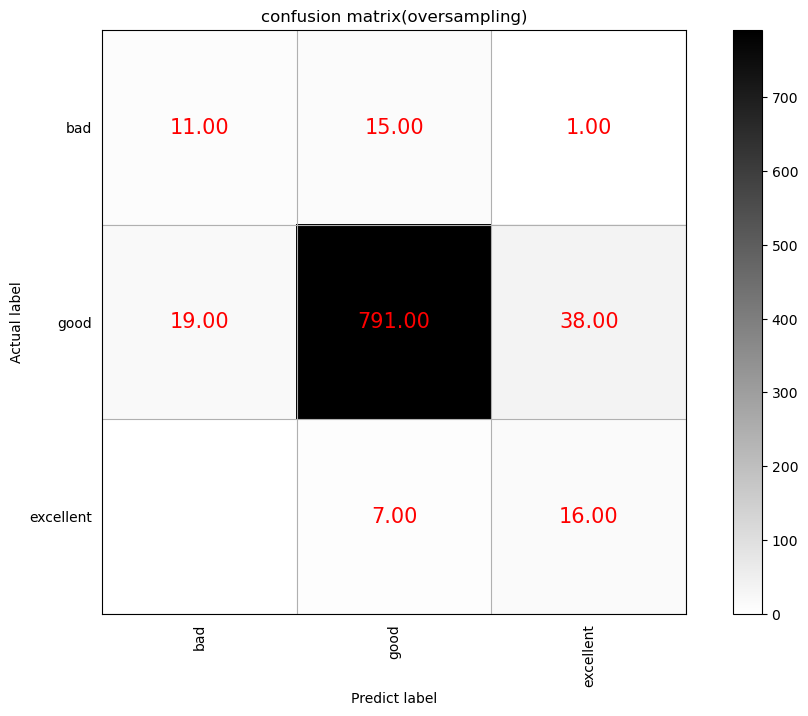

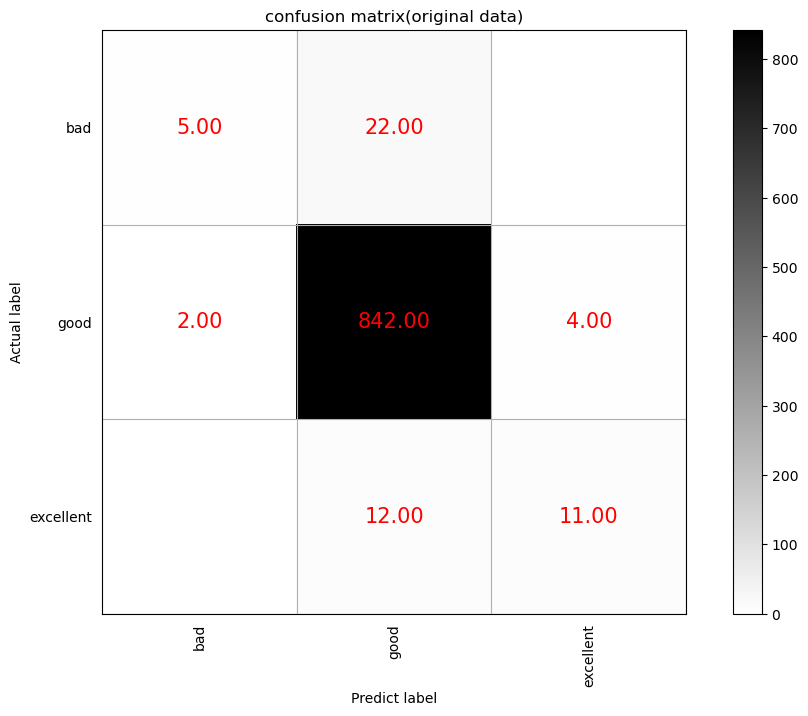

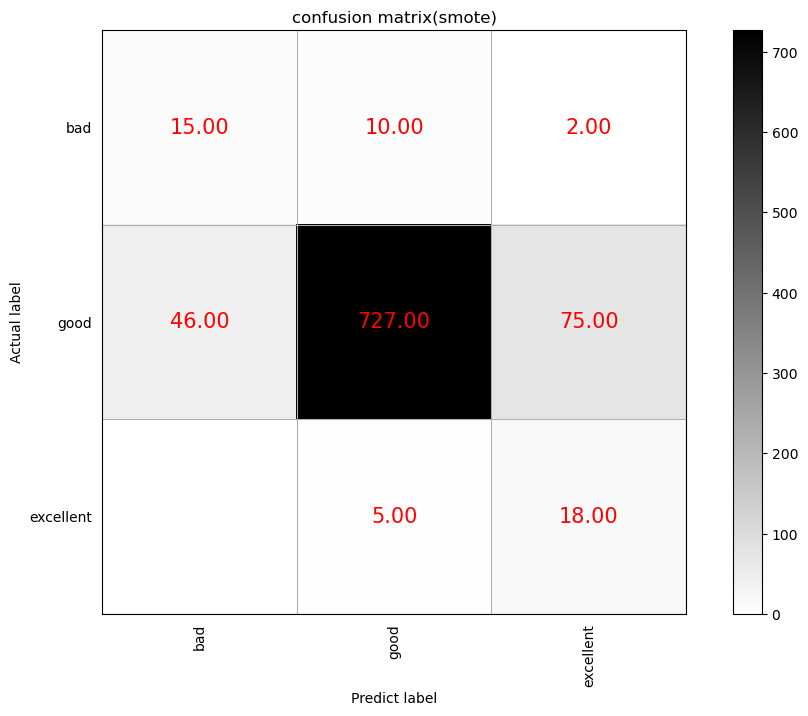

In [13]:
#knn part
from sklearn.neighbors import KNeighborsClassifier

#ori
knn =KNeighborsClassifier(weights="distance",n_neighbors=5)
y_pred = knn.fit(X_train, y_train).predict(X_test)
score=knn.score(X_test,y_test,sample_weight=None)
print(score)
print(confusion_matrix(y_test, y_pred))
#smote
knn_smote = KNeighborsClassifier(weights="distance",n_neighbors=5)
y_pred_smote = knn_smote.fit(X_train_smote, y_train_smote).predict(X_test)
score_smote=knn_smote.score(X,y,sample_weight=None)
print(score_smote)
print(confusion_matrix(y_test, y_pred_smote))
#over
knn_ros = KNeighborsClassifier(weights="distance",n_neighbors=5)
y_pred_ros = knn_ros.fit(X_train_ros, y_train_ros).predict(X_test)
score_ros=knn_ros.score(X,y,sample_weight=None)
print(score_ros)
print(confusion_matrix(y_test, y_pred_ros))
#under
knn_rus = KNeighborsClassifier(weights="distance",n_neighbors=5)
y_pred_rus = knn_rus.fit(X_train_rus, y_train_rus).predict(X_test)
score_rus=knn_rus.score(X,y,sample_weight=None)
print(score_rus)
print(confusion_matrix(y_test, y_pred_rus))

classes = ['bad', 'good', 'excellent']


cm = confusion_matrix(y_test, y_pred_ros)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(oversampling)')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(original data)')

cm = confusion_matrix(y_test, y_pred_smote)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(smote)')

0.9443207126948775
[[  0  27   0]
 [  0 848   0]
 [  0  23   0]]
0.4621380846325167
[[ 18   7   2]
 [168 380 300]
 [  2   4  17]]
0.4265033407572383
[[ 18   8   1]
 [203 347 298]
 [  1   4  18]]
0.4610244988864143
[[ 20   5   2]
 [179 376 293]
 [  1   4  18]]


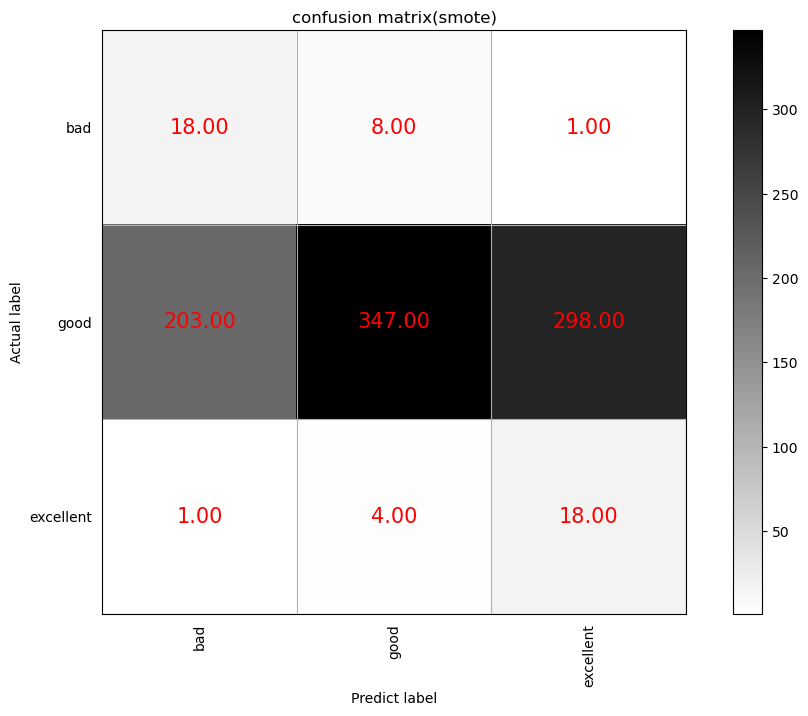

In [14]:
from sklearn.ensemble import RandomForestClassifier

#ori
trees = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = trees.fit(X_train, y_train).predict(X_test)
score=trees.score(X_test,y_test,sample_weight=None)
print(score)
print(confusion_matrix(y_test, y_pred))
#smote
trees_smote = RandomForestClassifier(max_depth=2, random_state=0)
y_pred_smote = trees_smote.fit(X_train_smote, y_train_smote).predict(X_test)
score_smote=trees_smote.score(X_test,y_test,sample_weight=None)
print(score_smote)
print(confusion_matrix(y_test, y_pred_smote))
#over
trees_ros = RandomForestClassifier(max_depth=2, random_state=0)
y_pred_ros = trees_ros.fit(X_train_ros, y_train_ros).predict(X_test)
score_ros=trees_ros.score(X_test,y_test,sample_weight=None)
print(score_ros)
print(confusion_matrix(y_test, y_pred_ros))
#under
trees_rus = RandomForestClassifier(max_depth=2, random_state=0)
y_pred_rus = trees_rus.fit(X_train_rus, y_train_rus).predict(X_test)
score_rus=trees_rus.score(X_test,y_test,sample_weight=None)
print(score_rus)
print(confusion_matrix(y_test, y_pred_rus))

cm = confusion_matrix(y_test_ros, y_pred_ros)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(smote)')

0.9265033407572383
[[  9  18   0]
 [ 17 810  21]
 [  0  10  13]]
0.8596881959910914
[[ 12  14   1]
 [ 45 742  61]
 [  1   4  18]]
0.9309576837416481
[[  8  19   0]
 [ 15 817  16]
 [  0  12  11]]
0.46770601336302897
[[ 18   5   4]
 [239 384 225]
 [  1   4  18]]


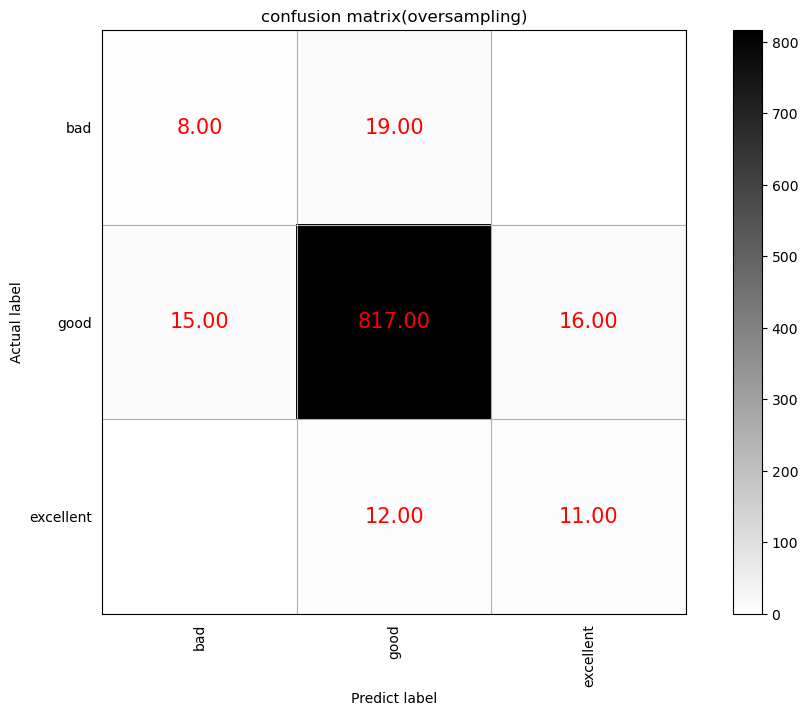

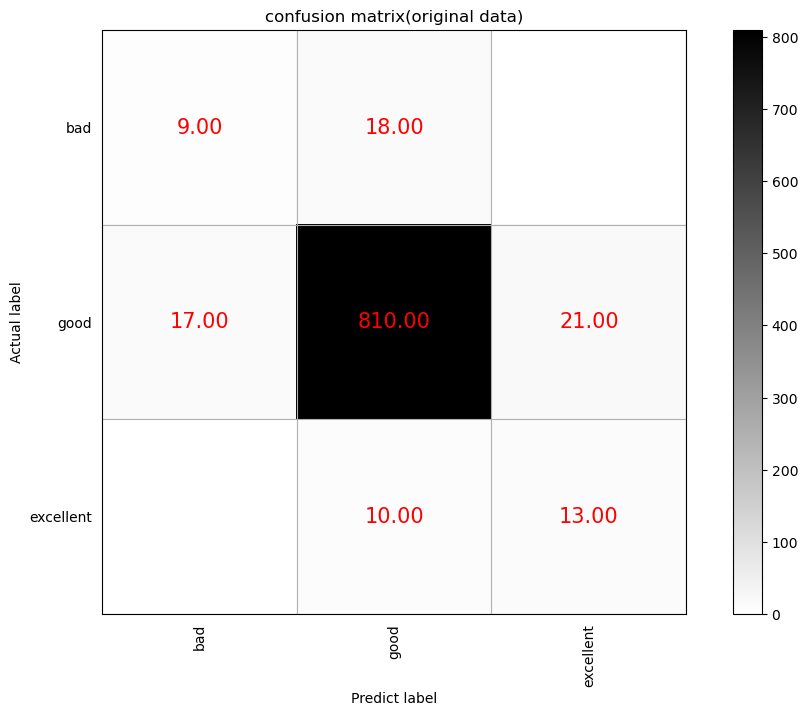

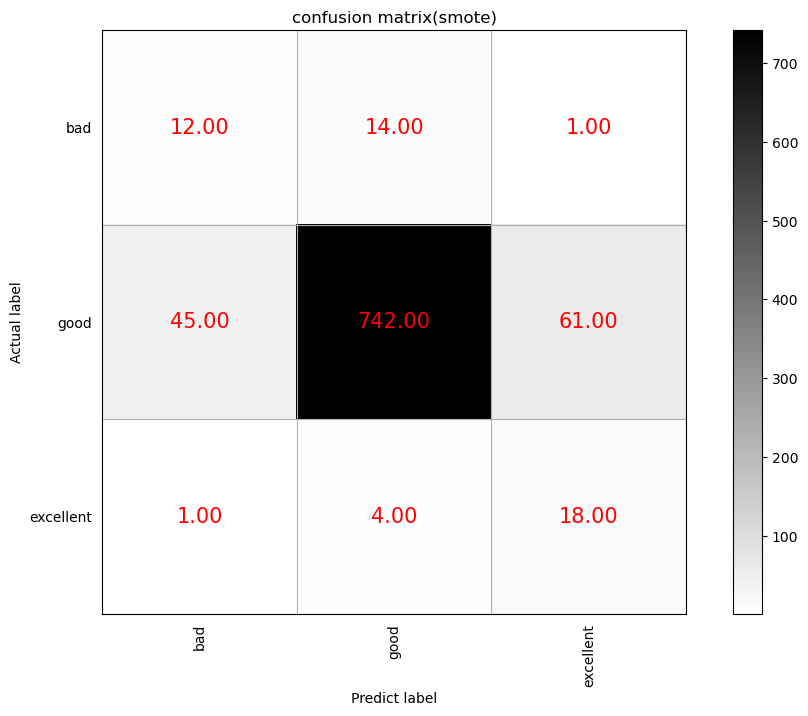

In [15]:
from sklearn import tree

#ori
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
score=clf.score(X_test,y_test,sample_weight=None)
print(score)
print(confusion_matrix(y_test, y_pred))
#smote
tree_smote = tree.DecisionTreeClassifier()
y_pred_smote = tree_smote.fit(X_train_smote, y_train_smote).predict(X_test)
score_smote=tree_smote.score(X_test,y_test,sample_weight=None)
print(score_smote)
print(confusion_matrix(y_test, y_pred_smote))
#over
tree_ros = tree.DecisionTreeClassifier()
y_pred_ros = tree_ros.fit(X_train_ros, y_train_ros).predict(X_test)
score_ros=tree_ros.score(X_test,y_test,sample_weight=None)
print(score_ros)
print(confusion_matrix(y_test, y_pred_ros))
#under
tree_rus = tree.DecisionTreeClassifier()
y_pred_rus = tree_rus.fit(X_train_rus, y_train_rus).predict(X_test)
score_rus=tree_rus.score(X_test,y_test,sample_weight=None)
print(score_rus)
print(confusion_matrix(y_test, y_pred_rus))

cm = confusion_matrix(y_test, y_pred_ros)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(oversampling)')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(original data)')

cm = confusion_matrix(y_test, y_pred_smote)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix(smote)')

In [16]:
#logistic part
from sklearn.linear_model import LogisticRegression

#ori
reg = LogisticRegression()
y_pred = reg.fit(X_train, y_train).predict(X_test)
score=reg.score(X_test,y_test,sample_weight=None)
print(score)
print(confusion_matrix(y_test, y_pred))
#smote
log_smote = LogisticRegression()
y_pred_smote = log_smote.fit(X_train_smote, y_train_smote).predict(X_test)
score_smote=log_smote.score(X_test,y_test,sample_weight=None)
print(score_smote)
print(confusion_matrix(y_test, y_pred_smote))
#over
log_ros = LogisticRegression()
y_pred_ros = log_ros.fit(X_train_ros, y_train_ros).predict(X_test)
score_ros=log_ros.score(X_test,y_test,sample_weight=None)
print(score_ros)
print(confusion_matrix(y_test, y_pred_ros))
#under
log_rus = LogisticRegression()
y_pred_rus = log_rus.fit(X_train_rus, y_train_rus).predict(X_test)
score_rus=log_rus.score(X_test,y_test,sample_weight=None)
print(score_rus)
print(confusion_matrix(y_test, y_pred_rus))

0.9443207126948775
[[  0  27   0]
 [  0 848   0]
 [  0  23   0]]
0.44097995545657015
[[ 20   6   1]
 [196 358 294]
 [  2   3  18]]
0.44320712694877507
[[ 21   6   0]
 [207 359 282]
 [  2   3  18]]
0.4521158129175947
[[ 18   8   1]
 [195 370 283]
 [  2   3  18]]


以下备用不运行

In [12]:
#knn part
from sklearn.neighbors import KNeighborsClassifier
knn_ori=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_ori.fit(X_train,y_train)
y_predict=knn_ori.predict(X_test)
score=knn_ori.score(X_test,y_test,sample_weight=None)
print(score)

0.955456570155902


In [13]:
#knn_somote part
from sklearn.neighbors import KNeighborsClassifier
knn_SMOTE=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_SMOTE.fit(X_train_res,y_train_res)
y_predict=knn_SMOTE.predict(X_test)
score=knn_SMOTE.score(X_test,y_test,sample_weight=None)
print(score)

0.8463251670378619


In [14]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print ('Train set with SMOTE:', X_train_res.shape, y_train_res.shape)

Train set with SMOTE: (10062, 11) (10062,)


In [15]:

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter( y_train_res)
print(counter)

Counter({'2': 4202, '3': 161, '1': 124})
Counter({'2': 3354, '1': 3354, '3': 3354})


In [16]:
from imblearn.under_sampling import ClusterCentroids
 
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_sample(X_train, y_train.ravel())
counter = Counter(y_resampled)
print(counter)


Counter({'1': 97, '2': 97, '3': 97})


In [17]:
#knn_cc part
#from sklearn.neighbors import KNeighborsClassifier
knn_cc=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_cc.fit(X_resampled,y_resampled)
y_predict=knn_cc.predict(X_test)
score=knn_cc.score(X_test,y_test,sample_weight=None)
print(score)

0.6692650334075724


In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, y_resampled_rus = rus.fit_sample(X_train, y_train.ravel())
counter = Counter(y_resampled_rus)
print(counter)
#knn_rus part
#from sklearn.neighbors import KNeighborsClassifier
knn_rus=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_rus.fit(X_resampled_rus,y_resampled_rus)
y_predict=knn_rus.predict(X_test)
score=knn_rus.score(X_test,y_test,sample_weight=None)
print(score)

Counter({'1': 97, '2': 97, '3': 97})
0.44988864142538976


In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_sample(X_train, y_train.ravel())
counter = Counter(y_resampled_ros)
print(counter)


Counter({'2': 3354, '1': 3354, '3': 3354})


In [20]:
#knn_ros part
#from sklearn.neighbors import KNeighborsClassifier
knn_ros=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_ros.fit(X_resampled_ros,y_resampled_ros)
y_predict=knn_ros.predict(X_test)
score=knn_ros.score(X_test,y_test,sample_weight=None)
print(score)

0.910913140311804


In [21]:
print(X_resampled_ros.shape)
print(X_train.shape)

(10062, 11)
(3589, 11)


In [22]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all',random_state=100)
X_resampled_ros, y_resampled_ros = ros.fit_sample(X, y)
counter = Counter(y_resampled_ros)
print(counter)
X_train, X_test, y_train, y_test = train_test_split( X_resampled_ros, y_resampled_ros, test_size=0.2, random_state=0)
#knn_ros part
#from sklearn.neighbors import KNeighborsClassifier
knn_ros=KNeighborsClassifier(weights="distance",n_neighbors=5) 
knn_ros.fit(X_train,y_train)
y_predict=knn_ros.predict(X_test)
score=knn_ros.score(X_test,y_test,sample_weight=None)
print(score)

Counter({'2': 4202, '3': 4202, '1': 4202})
0.9417129262490087


In [23]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all',random_state=100)
X_resampled_ros, y_resampled_ros = ros.fit_sample(X, y)
counter = Counter(y_resampled_ros)
print(counter)
X_train, X_test, y_train, y_test = train_test_split( X_resampled_ros, y_resampled_ros, test_size=0.2, random_state=0)
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_hat = reg.predict(X_test)
acc = metrics.accuracy_score(y_hat,y_test)
acc

Counter({'2': 4202, '3': 4202, '1': 4202})


0.6629659000793021

In [24]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all',random_state=100)
X_resampled_ros, y_resampled_ros = ros.fit_sample(X, y)
counter = Counter(y_resampled_ros)
print(counter)
X_train, X_test, y_train, y_test = train_test_split( X_resampled_ros, y_resampled_ros, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
 % (X_test.shape[0], (y_test != y_pred).sum()))

Counter({'2': 4202, '3': 4202, '1': 4202})
Number of mislabeled points out of a total 2522 points : 871


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[820,   0,   0],
       [ 75, 674,  72],
       [  0,   0, 881]], dtype=int64)

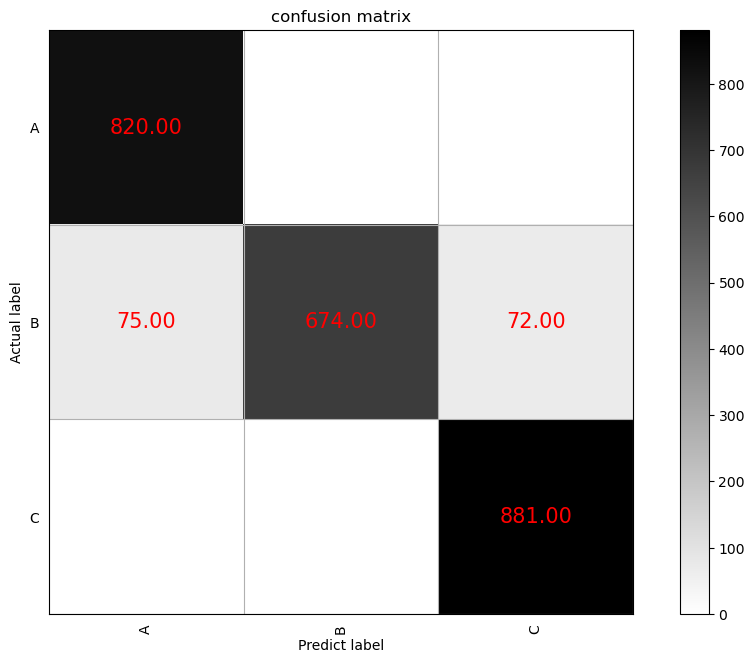

In [27]:
classes = ['A', 'B', 'C']


cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')